In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
path = "./files/car_evaluation.csv"
df = pd.read_csv(path, header=None)

In [96]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [97]:
df.shape

(1728, 7)

In [98]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [99]:
df.columns = col_names

In [100]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [101]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [102]:
df["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [103]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [104]:
X = df.drop(['class'], axis=1)
y = df['class']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [107]:
y_train.shape, y_test.shape

((1209,), (519,))

In [108]:
encoder = ce.OrdinalEncoder(cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [109]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [110]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [111]:
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

In [112]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [113]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

In [114]:
print('Decision tree train accuracy: ', train_accuracy_tree)
print('Decision tree test accuracy: ', test_accuracy_tree)

Decision tree train accuracy:  0.7733664185277088
Decision tree test accuracy:  0.7591522157996147


C:\Users\andre\AppData\Local\Temp\ipykernel_2896\3688133619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=columns, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)


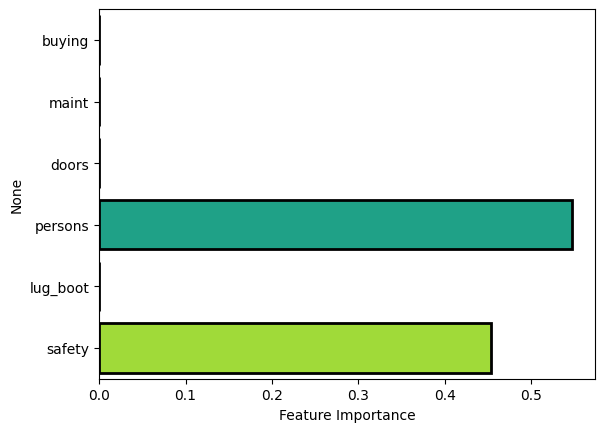

In [115]:
importance = tree.feature_importances_
columns = X.columns
sns.barplot(x=importance, y=columns, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)
plt.xlabel('Feature Importance')
plt.show()

In [116]:
df_2 = df.copy()

In [117]:
df_2.drop(['buying','maint','doors', 'lug_boot'], axis=1, inplace=True)

In [118]:
X_2 = df_2.drop(['class'], axis=1)
y_2 = df_2['class']

In [119]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [120]:
encoder_2 = ce.OrdinalEncoder(cols = ["persons", "safety"])
X_2_train = encoder_2.fit_transform(X_2_train)
X_2_test = encoder_2.transform(X_2_test)

In [121]:
tree_2 = DecisionTreeClassifier(max_depth=2, random_state=0)

In [122]:
tree_2.fit(X_2_train, y_2_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [123]:
y_2_train_pred_tree = tree_2.predict(X_2_train)
y_2_test_pred_tree = tree_2.predict(X_2_test)

In [124]:
train_2_accuracy_tree = accuracy_score(y_2_train, y_2_train_pred_tree)
test_2_accuracy_tree = accuracy_score(y_2_test, y_2_test_pred_tree)

In [125]:
print('Decision tree train accuracy: ', train_2_accuracy_tree)
print('Decision tree test accuracy: ', test_2_accuracy_tree)

Decision tree train accuracy:  0.7733664185277088
Decision tree test accuracy:  0.7591522157996147


C:\Users\andre\AppData\Local\Temp\ipykernel_2896\2341142898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=columns, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)


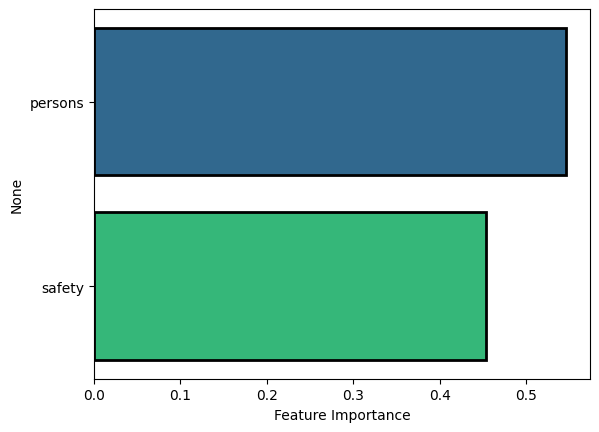

In [126]:
importance = tree_2.feature_importances_
columns = X_2.columns
sns.barplot(x=importance, y=columns, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)
plt.xlabel('Feature Importance')
plt.show()

## Entrenamiento con Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators=15, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [128]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [129]:
print('Random Forest train accuracy: ', accuracy_score(y_train, y_train_pred_rf))
print('Random Forest test accuracy: ', accuracy_score(y_test, y_test_pred_rf))

Random Forest train accuracy:  0.9983457402812241
Random Forest test accuracy:  0.8863198458574181


In [130]:
features_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

safety      0.245588
persons     0.227362
buying      0.225328
maint       0.138066
lug_boot    0.085990
doors       0.077666
dtype: float64

C:\Users\andre\AppData\Local\Temp\ipykernel_2896\930749757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_scores, y=features_scores.index, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)


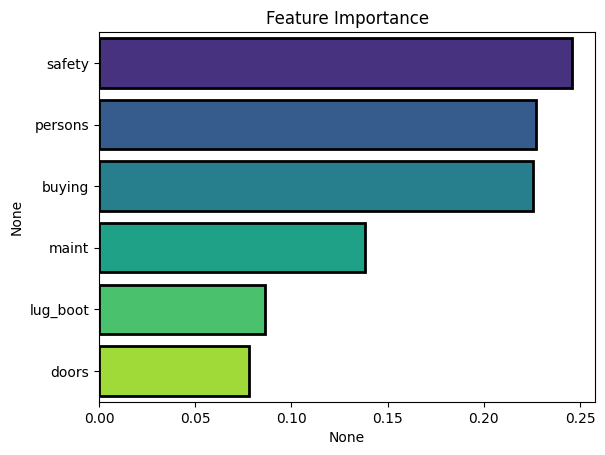

In [131]:
sns.barplot(x=features_scores, y=features_scores.index, palette="viridis", saturation=2, edgecolor=(0,0,0), linewidth=2)
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

         acc       0.73      0.81      0.77       118
        good       0.60      0.32      0.41        19
       unacc       0.95      0.97      0.96       358
       vgood       0.83      0.42      0.56        24

    accuracy                           0.89       519
   macro avg       0.78      0.63      0.68       519
weighted avg       0.88      0.89      0.88       519



<Axes: >

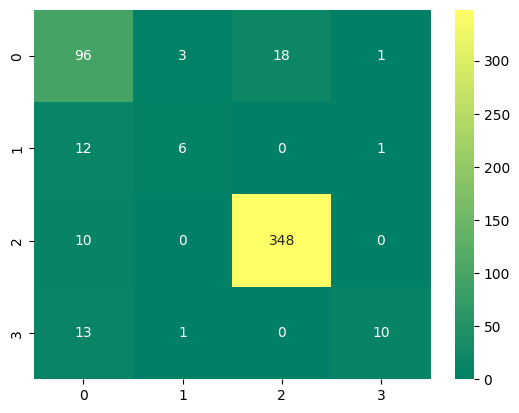

In [132]:
cm = confusion_matrix(y_test, y_test_pred_rf)
print(classification_report(y_test, y_test_pred_rf))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer')